In [1]:
import pandas as pd
import xarray as xr
import numpy as np

# matplotlib import
from matplotlib import pyplot as plt
import matplotlib.colors as colors
from matplotlib.colors import ListedColormap

In [2]:
# import filtered ETCs
fetc = pd.read_csv("/pampa/cloutier/storm_tracks/filtered/etc24_consec_v3.csv")

In [31]:
# get the average over the duration when the center was within the CRCM6 region
fetc_true = fetc.loc[fetc.HU == True]
szn_mean = fetc_true.groupby(['season', 'storm'])[['10WS_av08', '85WS_av08']].mean().reset_index()

# get mean and std 10WS_av08 and 850WS_av08 for catalogue and filtered etcs
mean_10 = szn_mean['10WS_av08'].mean()
mean_85 = szn_mean['85WS_av08'].mean()
std_10 = szn_mean['10WS_av08'].std()
std_85 = szn_mean['85WS_av08'].std()

# normalize the values
szn_mean['n_85WS_av08'] = (szn_mean['85WS_av08'] - mean_85) / std_85
szn_mean['n_10WS_av08'] = (szn_mean['10WS_av08'] - mean_10) / std_10

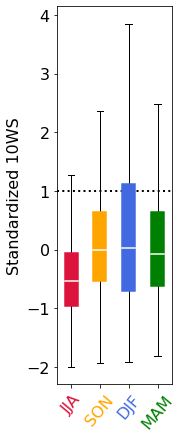

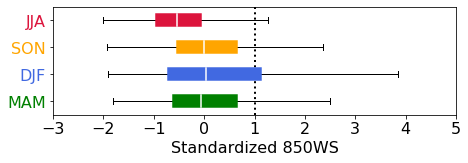

In [111]:
colors = {'JJA': 'crimson', 'SON': 'orange', 'DJF': 'royalblue', 'MAM': 'g'}

# Reorganize the seasons order
season_order = ['JJA', 'SON', 'DJF', 'MAM']
szn_mean['season'] = pd.Categorical(szn_mean['season'], categories=season_order, ordered=True)
szn_mean = szn_mean.sort_values('season')

boxplot10 = szn_mean.boxplot(by='season', column=['n_10WS_av08'], sym='', figsize=(2,7),
                           grid=False, patch_artist=True, fontsize=16,
                           medianprops = dict(color = "white", linewidth = 1.5),
                           whiskerprops = dict(color = "black"))

# Assign color for each box
for season, box in zip(season_order, boxplot10.artists):
    box.set(color=colors[season], linewidth=1.5)
    box.set(facecolor=colors[season])

# Remove automatic titles
boxplot10.set_title('')
boxplot10.set_xlabel('')
boxplot10.set_ylabel('Standardized 10WS', fontsize=16)
boxplot10.get_figure().suptitle('')

# Add horizontal line
plt.xticks(rotation=50)

# Change x ticks colours
plt.axhline(y=1, color='black', linestyle='dotted', linewidth = 2)
tick_labels = boxplot10.get_xticklabels()
for label, season in zip(tick_labels, season_order):
    label.set_color(colors[season])

plt.show()

# Reorganize the seasons order
season_order = ['MAM', 'DJF', 'SON', 'JJA']
szn_mean['season'] = pd.Categorical(szn_mean['season'], categories=season_order, ordered=True)
szn_mean = szn_mean.sort_values('season')

boxplot85 = szn_mean.boxplot(by='season', column=['n_10WS_av08'], sym='', figsize=(7,2),
                           grid=False, patch_artist=True, fontsize=16, vert=False,
                           medianprops = dict(color = "white", linewidth = 1.5),
                           whiskerprops = dict(color = "black"))

# Assign color for each box
for season, box in zip(season_order, boxplot85.artists):
    box.set(color=colors[season], linewidth=1.5)
    box.set(facecolor=colors[season])

# Remove automatic titles
boxplot85.set_title('')
boxplot85.set_xlabel('Standardized 850WS', fontsize=16)
boxplot85.get_figure().suptitle('')
plt.xlim(-3, 5)

# Add vertical line
plt.axvline(x=1, color='black', linestyle='dotted', linewidth = 2)

# Change x ticks colours
tick_labels = boxplot85.get_yticklabels()
for label, season in zip(tick_labels, season_order):
    label.set_color(colors[season])
    
plt.show()